<a href="https://colab.research.google.com/github/brimas3/DATA342-Lab-1/blob/main/DATA342_Lab_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install Required Libraries

!pip install openpyxl matplotlib pandas

In [3]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Load Excel File

import requests
import pandas as pd

file_id = '14detpDac5-JgJ4prGiXZ2UEJQM3UmzGUnJLZ-ERWT64'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('DATA342 Lab 1 Data (Netflix vs. Disney).xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('DATA342 Lab 1 Data (Netflix vs. Disney).xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")


In [10]:
# Display Sample Rows

print(df.head())

        Date Ticker  Adj Close  Daily Return
0 2024-01-02   NFLX     468.50           NaN
1 2024-01-03   NFLX     470.26      0.003757
2 2024-01-04   NFLX     474.67      0.009378
3 2024-01-05   NFLX     474.06     -0.001285
4 2024-01-08   NFLX     485.03      0.023141


In [11]:
# Clean and Format the Data

df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

In [12]:
# Seperate Data

nflx_df = df[df['Ticker'] == 'NFLX'].copy()
dis_df = df[df['Ticker'] == 'DIS'].copy()

In [24]:
# Display Sample Rows

print("\nNetflix Daily Returns:")
print(nflx_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nDIS Daily Returns:")
print(dis_df[['Date', 'Adj Close', 'Daily Return']].head())


Netflix Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03     470.26      0.003757
2 2024-01-04     474.67      0.009378
3 2024-01-05     474.06     -0.001285
4 2024-01-08     485.03      0.023141
5 2024-01-09     482.09     -0.006061

DIS Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-03      90.44     -0.899559
252 2024-01-04      89.37     -0.011831
253 2024-01-05      89.70      0.003693
254 2024-01-08      90.34      0.007135
255 2024-01-09      88.49     -0.020478


/tmp/ipython-input-2952745585.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([nflx_df['Daily Return'], dis_df['Daily Return']], labels=['NFLX', 'DIS'])


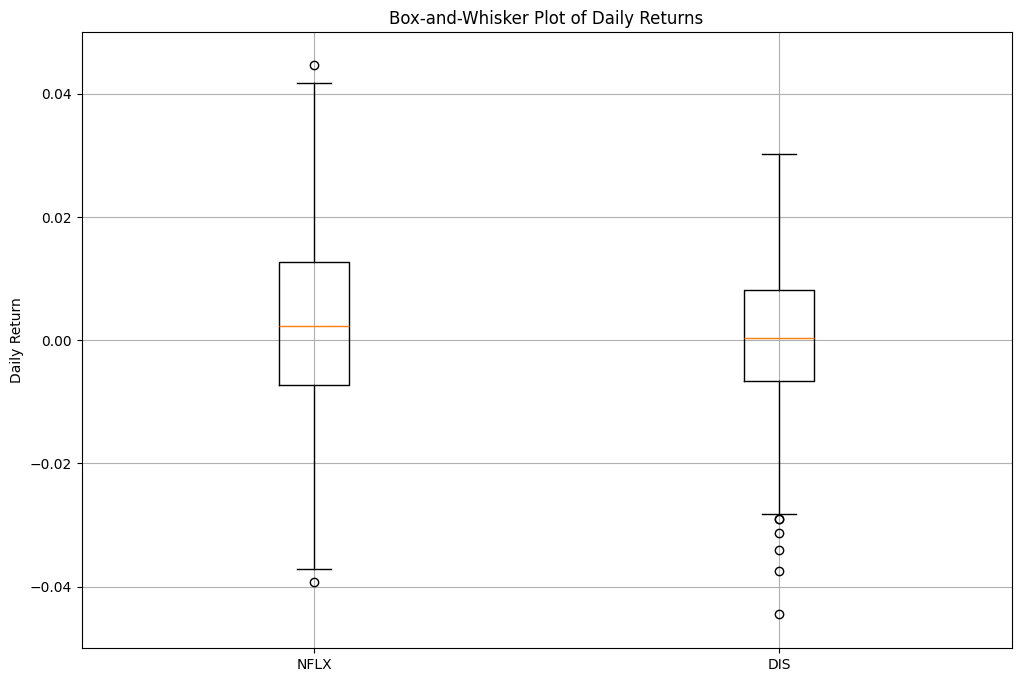

In [25]:
plt.figure(figsize=(12, 8))
plt.boxplot([nflx_df['Daily Return'], dis_df['Daily Return']], labels=['NFLX', 'DIS'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.ylim(-0.05, 0.05)
plt.grid(True)
plt.show()